# KMeans Clustering Practical

This practical covers the Kmeans clustering algorithms. The basic idea of clustering is partitioning a dataset into groups with identical or similar features. The classic user case is customer segmentation, where customers are divided into groups of similar characteristics.

In what follows I implement the Kmeans clustering algorithm with 2 examples:

* **Customer segmentation**
* **Image segmentation**

The data for this practical was obtained from the IBM cloud storage.

#### Importing Libraries

First, lets import the librabries need for the task as shown below

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

import requests
from PIL import Image
from io import BytesIO

import PIL.Image
import urllib.request

## Customer  Segmentation

For this task, I retrieve the customer dataset. The **main goal** for this task will be to segment customers into groups based on their card debt.

Steps involved in this analysis are:
* Loading the dataset
* Data cleaning
* Data exploration
* Variable transformation
* Data modelling
* Insights




### Loading the dataset

In [2]:
# Loading the dataset
data= pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")

data.head() # Previewing the dataset

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Data cleaning

In [3]:
# Exploring the details of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


Notice from above the range of the dataset is 0 to 849, thus each feature should have 850 observation. But notice that defaulted is 700 meaning there are over 150 missing values for this feature. We can confirm this with the isnull() function below.

In [4]:
# Checking for missing values.
data.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [5]:
# Checking for NaN values.
data.isna().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

Next, I drop rows with NaN values this way then don't impact the analysis, I also remove to features which are not of interest. First, I remove `Address` since we are not interest in that, I also remove `Defaulted` particularly because of the missing values it had.

In [6]:
data.dropna(inplace=True)    # to drop the row with NaN

In [7]:
df = data.drop(columns=['Address', 'Defaulted'])# removing the Address and Defaulted columns

In [8]:
df.head() # previewing our clean data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,6.3
1,2,47,1,26,100,4.582,8.218,12.8
2,3,33,2,10,57,6.111,5.802,20.9
3,4,29,2,4,19,0.681,0.516,6.3
4,5,47,1,31,253,9.308,8.908,7.2


In [9]:
df.shape

(700, 8)

### Data  exploration 

In [10]:
df.describe() # basic descriptive statistics of the features in the dataframe

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,430.461429,34.860000,1.722857,8.388571,45.601429,1.553566,3.058196,10.260571
std,243.323524,7.997342,0.928206,6.658039,36.814226,2.117196,3.287550,6.827234
min,1.000000,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.400000
25%,222.750000,29.000000,1.000000,3.000000,24.000000,0.368750,1.044000,5.000000
50%,433.500000,34.000000,1.000000,7.000000,34.000000,0.855000,1.987500,8.600000
75%,642.250000,40.000000,2.000000,12.000000,55.000000,1.901750,3.923250,14.125000
max,850.000000,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,41.300000


To get a first insight into the features, I use a histogram to plot the distribution of some features. The histogram shows the feature `Card debt`is skwed to positively skewed while `Age` seem a bit normally distributed. This is just a first glimpse to get an idea about how some of the features in the dataframe is distributed before I proceed with the analysis.

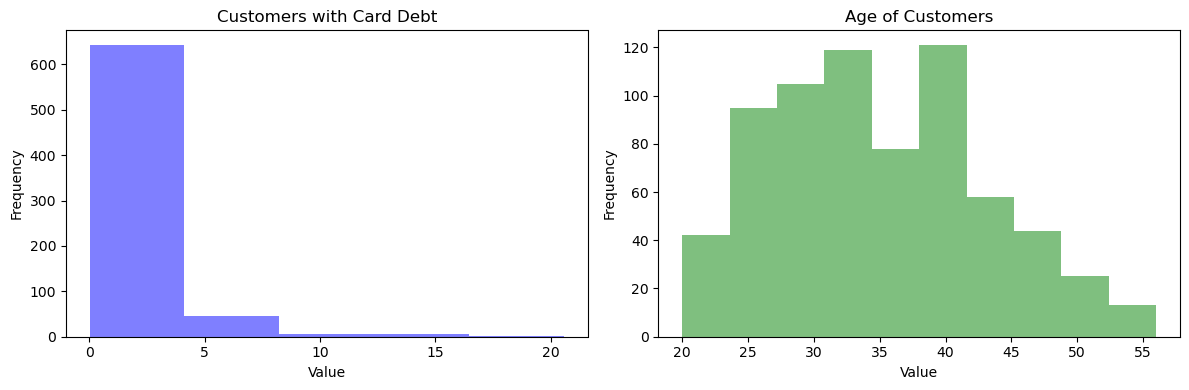

In [12]:
# Create a 1x3 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Create the first histogram on the first subplot
axes[0].hist(df['Card Debt'], bins=5, color='blue', alpha=0.5)
axes[0].set_title('Customers with Card Debt')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Create the second histogram on the second subplot
axes[1].hist(df['Age'], bins=10, color='green', alpha=0.5)
axes[1].set_title('Age of Customers')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

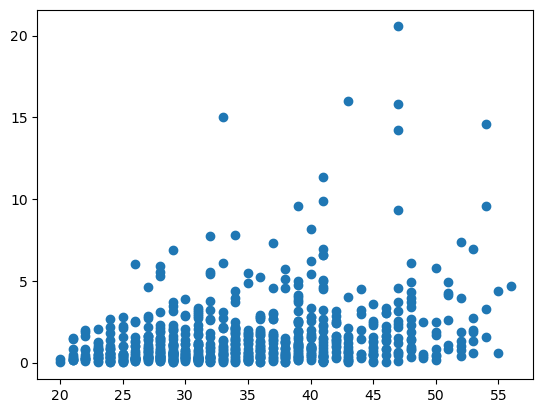

In [17]:
plt.scatter(df[ 'Age'], df['Card Debt']) # Simple scatter of age and income

In machine learning, the standard scaler is used to normalize features so that they have zero means and unit variance. From observation, notice that `income` have a bigger scale than all the other features. In the next lines of code I apply the standard scaler, I normalize the dataset so that my machine-learning algorithm will read the features on an equal scale regardless of their distribution and magnitude.

In [13]:
Scaler = StandardScaler() 
X = df[['Age', 'Income', 'Edu', 'Years Employed', 'Other Debt', 'DebtIncomeRatio', 'Card Debt']]
X = Scaler.fit_transform(X)
X[0:5]
# Normalizing Age and Income

array([[ 0.76830405, -0.72310225,  0.29879269, -0.35900652, -0.60428433,
        -0.58052847, -0.67569934],
       [ 1.51908977,  1.47870741, -0.77932527,  2.64702891,  1.5706204 ,
         0.37222169,  1.43142147],
       [-0.23274357,  0.30984549,  0.29879269,  0.24220057,  0.83520125,
         1.55949495,  2.15411948],
       [-0.73326739, -0.72310225,  0.29879269, -0.65961006, -0.77383254,
        -0.58052847, -0.41242741],
       [ 1.51908977,  5.6376812 , -0.77932527,  3.39853777,  1.78065319,
        -0.44860921,  3.66521532]])

### Data Modelling

**Kmeans algorithm and elbow method**

The Kmeans algorithm is a clustering algorithm used to categorise features into groups with similar characteristics. In what follows, I apply the Kmeans algorithm to my dataset to groups with similar features.

But first, the Kmeans algorithm requires me to specify the 'K', which is the number of groups or clusters I want to group my data into. While there are many approaches to specifying the optimum number of clusters, for my analysis, I choose to apply the elbow technique. The elbow technique is one method for selecting the optimum number of clusters to use in the Kmeans algorithm. This is done by running and fitting the several Kmeans model on the dataset, then plotting the sum of squared error **(sse)** between each point and the cluster centres, and then selecting the 'K' where the curve makes an elbow.


In [15]:
krange = range(1,8)
sse = []
for k in krange:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_) # the next few steps is how we get the number of number of clusters (k) to use
sse 

[4900.000000000001,
 3541.664377805402,
 3027.948578479647,
 2647.876511527256,
 2345.401798994235,
 2116.4011934018827,
 1961.7614628546612]

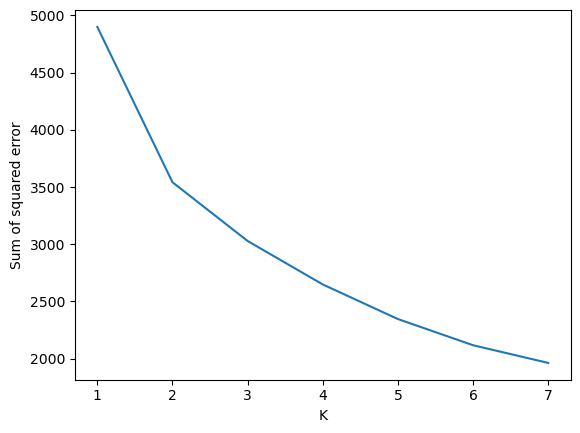

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(krange,sse)

**Clustering the data using K-means model**

Applying the K-means model to cluster the dataset into groups with similar features, firstly, I specify the number of clusters 'K' which is 2 following my observation from the elbow curve in the output above. Next, I initialize K-centriods (cluster means) at random using the k-means ++ operation. I also specify n-init which is the number of times I allow the k-means algorithm to run with a different cluster means or centroids.


In [18]:
# modelling and fitting the Kmeans model
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
labels

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [19]:
df["km_clusters"] = labels
df.head(5)
# labels are simply the clusters (which are 2= 0,1)...we simply append it to the df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,km_clusters
0,1,41,2,6,19,0.124,1.073,6.3,1
1,2,47,1,26,100,4.582,8.218,12.8,0
2,3,33,2,10,57,6.111,5.802,20.9,0
3,4,29,2,4,19,0.681,0.516,6.3,1
4,5,47,1,31,253,9.308,8.908,7.2,0


In [20]:
k_means.cluster_centers_ # this are your centroid, note we can show the centroid in the scatter plot as seen below

array([[ 0.87659045,  1.17621124,  0.2504156 ,  1.09487408,  1.29443821,
         0.65757693,  1.11601144],
       [-0.2513752 , -0.33729587, -0.07181036, -0.31397124, -0.37119919,
        -0.18856986, -0.32003269]])

**Checking for Age and Card Debt**

Specifically, I can further group the dataset for only two features, Age and Card debt, illustrated in the code below.

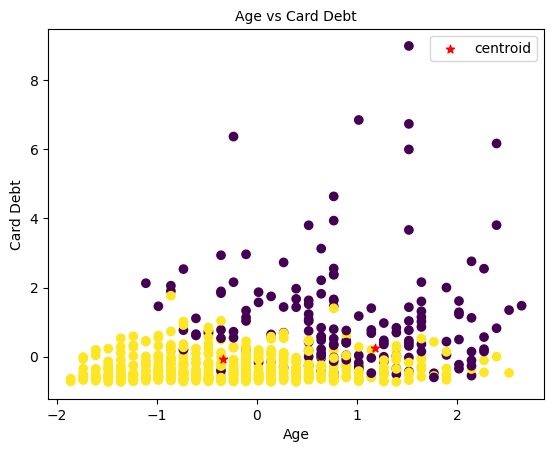

In [24]:
# Plotting the scatter plot of the features to show the clusters

plt.scatter(X[:, 0], X[:, 6], c=df['km_clusters'])
plt.xlabel('Age', fontsize=10)
plt.ylabel('Card Debt', fontsize=10)
plt.title('Age vs Card Debt', fontsize=10)

plt.scatter(k_means.cluster_centers_[:,1],k_means.cluster_centers_[:,2],color='red',marker='*', label='centroid')

plt.legend()
plt.show()

### Insights

By observing the plot above, we can group the dataset of customers into two groups of similar characteristics, namely:

* Young customers with small card debts
* Older customers with medium amount of card debts.

## Image Segmentation

For this task, I retrieve an image, then use Kmeans to cluster an Image.

Steps involved are:

* Cluster the pixels of an image based on their brightness
* Substitute each pixel with the average brigtness of all the pixel in the image

The image is 640px by 426px


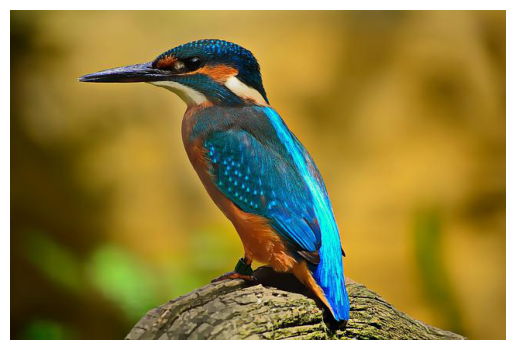

In [25]:
# first loading the image
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/kingfisher.jpeg'
img= np.array(PIL.Image.open(urllib.request.urlopen(url)))

print(f'The image is {img.shape[1]}px by {img.shape[0]}px')  # Note: Width is img.shape[1] and Height is img.shape[0]

plt.axis('off')
plt.imshow(img)

In [26]:
# Modelling and fitting the kmeans model
X = img.reshape(-1, 3) 
km = KMeans(n_clusters=k, random_state=12)
km.fit(X)

KMeans(n_clusters=7, random_state=12)

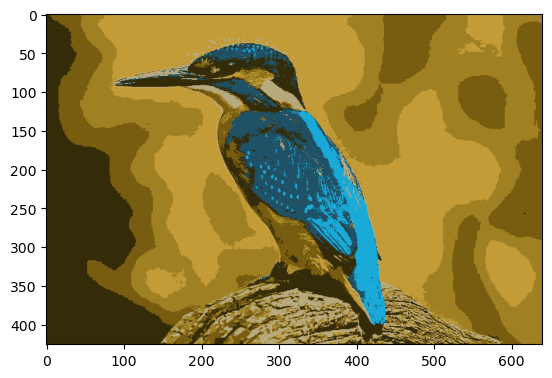

In [27]:
# To show the segmented image
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)

### Thanks for following!